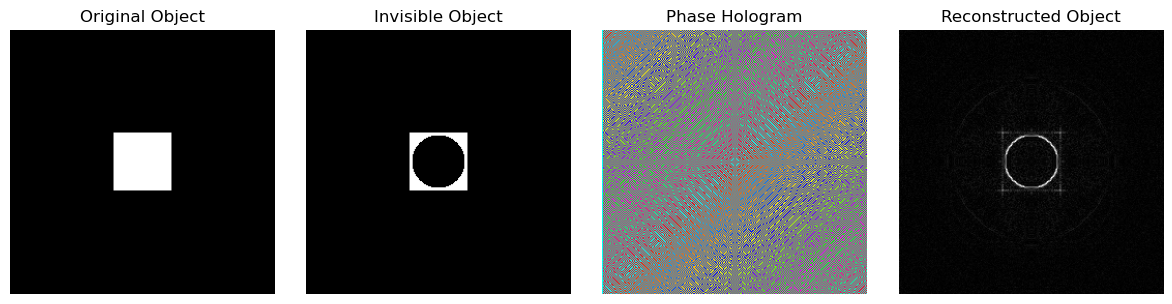

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# Create object (white square) + background
bg = np.zeros((256, 256))
bg[100:156, 100:156] = 1.0

# "Invisible object" (a circular refractive region)
x = np.linspace(-1, 1, 256)
X, Y = np.meshgrid(x, x)
mask = X**2 + Y**2 < 0.2**2

# Apply mask = "object invisible"
obj_invisible = np.copy(bg)
obj_invisible[mask] = 0

# Fourier hologram (simplified)
hologram = np.fft.fftshift(np.fft.fft2(obj_invisible))
phase = np.angle(hologram)

# Reconstructions
reconstructed = np.abs(np.fft.ifft2(np.fft.ifftshift(np.exp(1j*phase))))

# Plot panels
fig, axs = plt.subplots(1, 4, figsize=(12, 3))
axs[0].imshow(bg, cmap="gray")
axs[0].set_title("Original Object")

axs[1].imshow(obj_invisible, cmap="gray")
axs[1].set_title("Invisible Object")

axs[2].imshow(phase, cmap="hsv")
axs[2].set_title("Phase Hologram")

axs[3].imshow(reconstructed, cmap="gray")
axs[3].set_title("Reconstructed Object")

for a in axs:
    a.axis("off")

plt.tight_layout()
plt.savefig("hologram_camouflage_panels.png", dpi=300)
plt.show()

# Save phase-only hologram separately
plt.imsave("hologram_phase.png", phase, cmap="hsv")
